# LOADING NECCESARY LIBARIES 

In [28]:
# Familiar imports
import numpy as np
import pandas as pd

# For ordinal encoding categorical variables, splitting data
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

# For training random forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import sklearn.metrics as sm
from sklearn.metrics import accuracy_score,confusion_matrix


import datetime
import locale

import seaborn as sns
import warnings
from matplotlib import pylab as plt

# LOAD DATA

In [29]:
# Load the training data
train = pd.read_csv("sales_train.csv")
items = pd.read_csv('items.csv')
test = pd.read_csv('sales_test.csv')
categories = pd.read_csv('item_categories.csv')
shops = pd.read_csv('shops.csv')
train = pd.read_csv("sales_train.csv")




# ANALYSIS

In [30]:
items.head()


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [31]:
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [32]:
# load the data sets
import pandas as pd
sales_train_df = pd.read_csv('sales_train.csv')
test_df = pd.read_csv('test.csv')
item_categories = pd.read_csv('item_categories.csv')
items = pd.read_csv('items.csv')
shops = pd.read_csv('shops.csv')
sample_submission = pd.read_csv('sample_submission.csv')

print('Number of Training Samples = {}'.format(sales_train_df.shape[0]))
print('Number of Test Samples = {}\n'.format(test_df.shape[0]))

print('Training X Shape = {}'.format(sales_train_df.shape))
print('Test X Shape = {}'.format(test_df.shape))
print('Test y Shape = {}\n'.format(test_df.shape[0]))

print('Index of Train set:\n', sales_train_df.columns)
print(sales_train_df.info())
print('\nIndex of Test set:\n', test_df.columns)


print('\nMissing values of Train set:\n', sales_train_df.isnull().sum())
print('\nNull values of Train set:\n', sales_train_df.isna().sum())

Number of Training Samples = 2935849
Number of Test Samples = 214200

Training X Shape = (2935849, 6)
Test X Shape = (214200, 3)
Test y Shape = 214200

Index of Train set:
 Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
None

Index of Test set:
 Index(['ID', 'shop_id', 'item_id'], dtype='object')

Missing values of Train set:
 date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

Null values of Train set:
 date              0
date_block_num

In [33]:
categories.head()


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [34]:
shops.head()


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [35]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [36]:
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [37]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


In [38]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [39]:
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [41]:
import numpy as np
def downcast_dtypes(df):
    float_cols = [c for c in df if df[c].dtype == "float64"]
    int_cols = [c for c in df if df[c].dtype in ["int64", "int32"]]
    df[float_cols] = df[float_cols].astype(np.float32)
    df[int_cols] = df[int_cols].astype(np.int16)
    return df

sales_train_df = downcast_dtypes(sales_train_df)
print(sales_train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int16  
 2   shop_id         int16  
 3   item_id         int16  
 4   item_price      float32
 5   item_cnt_day    float32
dtypes: float32(2), int16(3), object(1)
memory usage: 61.6+ MB
None


In [42]:
# converting date object to datetime format
sales_train_df['date'] = pd.to_datetime(sales_train_df['date'],format = '%d.%m.%Y')
print('Min date from train set: %s' % sales_train_df['date'].min().date())
print('Max date from train set: %s' % sales_train_df['date'].max().date())

Min date from train set: 2013-01-01
Max date from train set: 2015-10-31


In [43]:
# print min and max num assigned to the months
print('Min date_block_num from train set: %s' % sales_train_df['date_block_num'].min())
print('Max date_block_num from train set: %s' % sales_train_df['date_block_num'].max())

Min date_block_num from train set: 0
Max date_block_num from train set: 33


In [44]:
print('Number of duplicates in items:', len(items[items.duplicated()]))

Number of duplicates in items: 0


In [45]:
print('Number of duplicates in items:', len(shops[shops.duplicated()]))

Number of duplicates in items: 0


In [46]:
print('Number of duplicates in items:', len(items[train.duplicated()]))

Number of duplicates in items: 0


<ipython-input-46-8b480a9f4923>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('Number of duplicates in items:', len(items[train.duplicated()]))


# DATA VISUALIZATION 

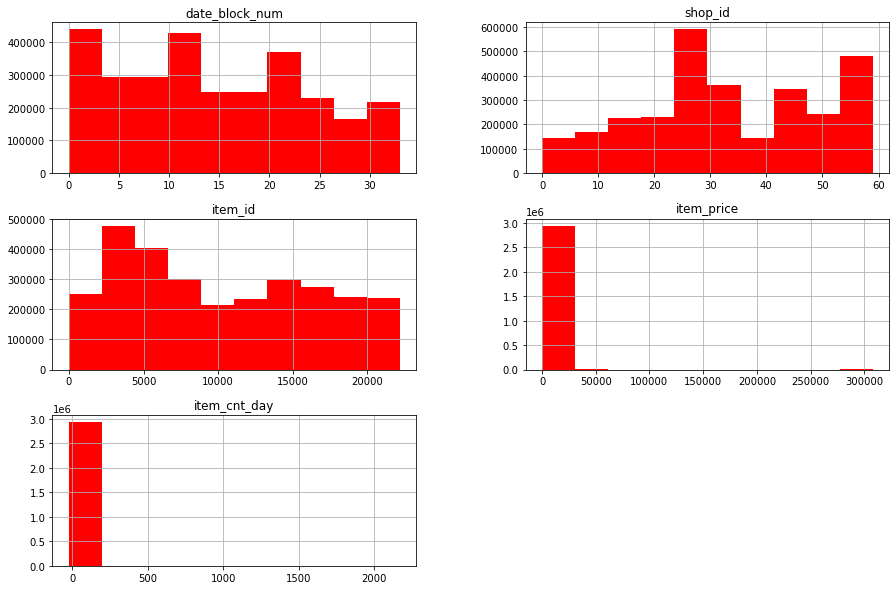

In [47]:
train.hist(figsize=(15,10) ,color='red')
plt.show()

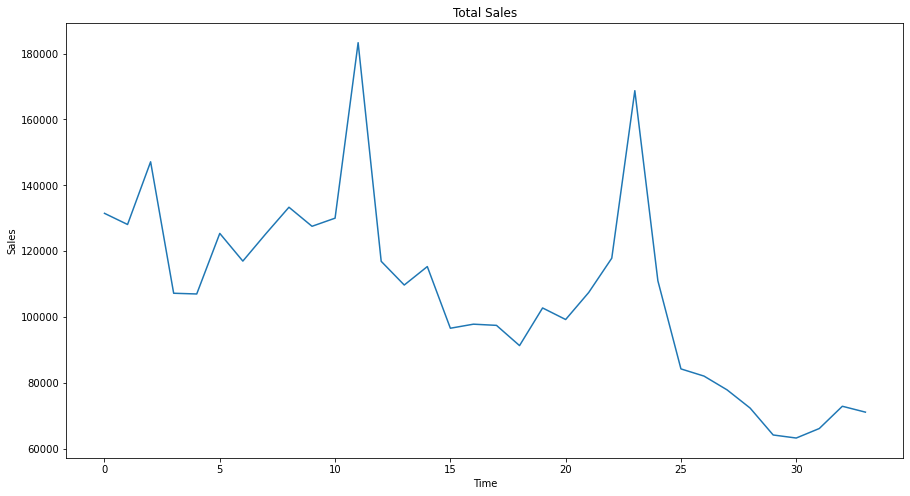

In [48]:
ts=sales_train_df.groupby(["date_block_num"])["item_cnt_day"].sum()
ts.astype('float')
plt.figure(figsize=(15,8))
plt.title('Total Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(ts);

## items 

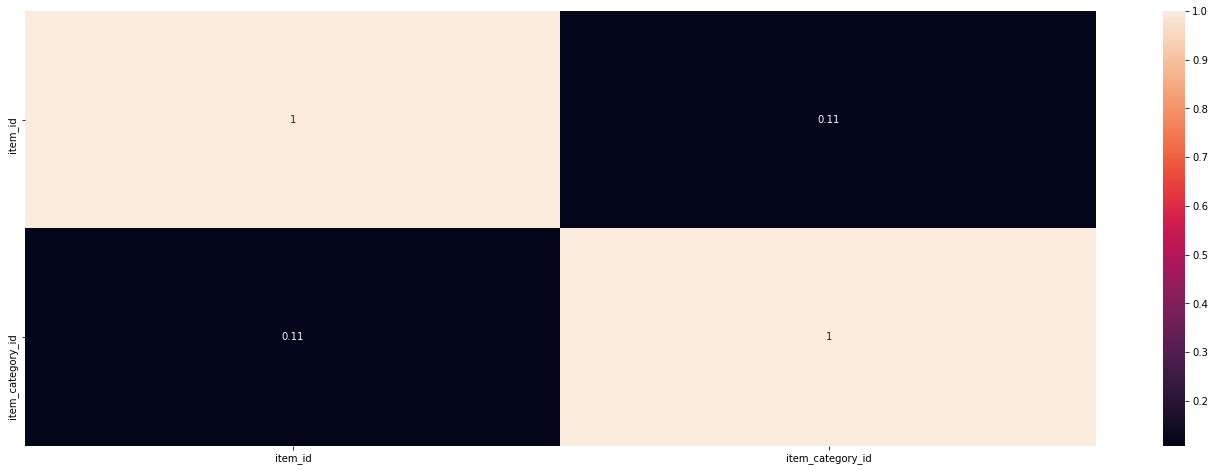

In [49]:
plt.figure(figsize=(24, 8))
sns.heatmap(items.corr(), annot=True);

## Shops

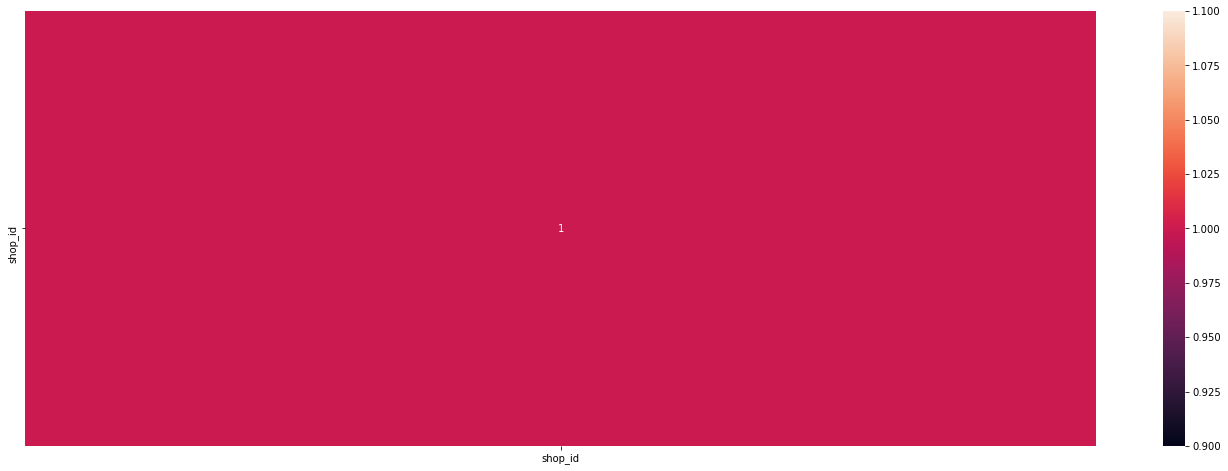

In [50]:
plt.figure(figsize=(24, 8))
sns.heatmap(shops.corr(), annot=True);

## categories

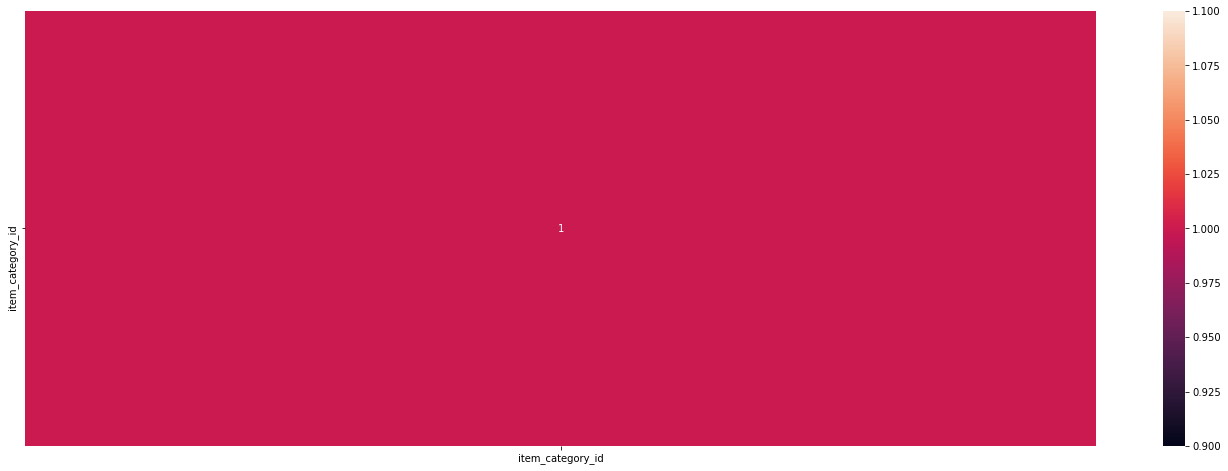

In [51]:
plt.figure(figsize=(24, 8))
sns.heatmap(categories.corr(), annot=True);

## Train data

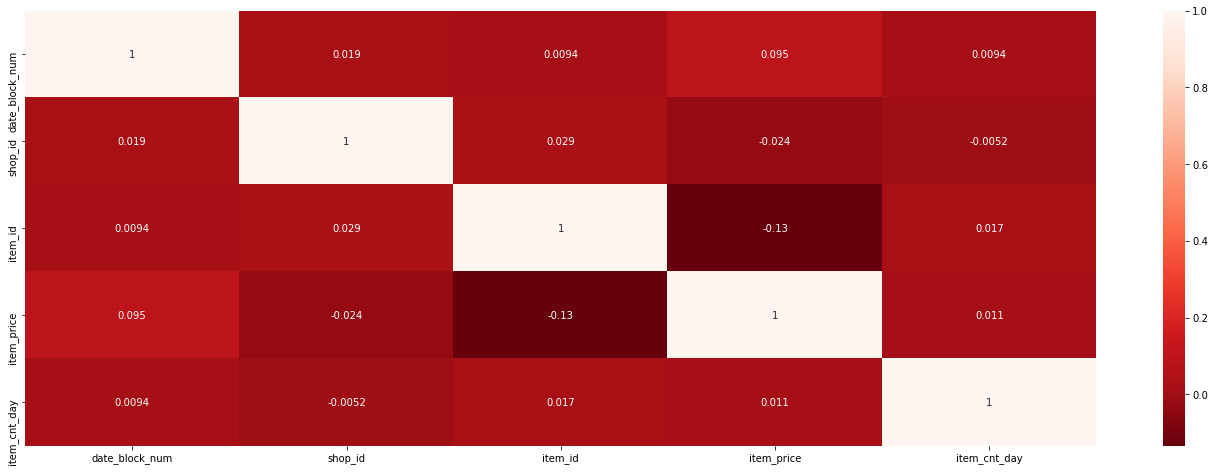

In [52]:
plt.figure(figsize=(24, 8))
sns.heatmap(train.corr(), annot=True,cmap = "Reds_r");

Sale volume outliers: [20949 11373]
Item price outliers: [6066]


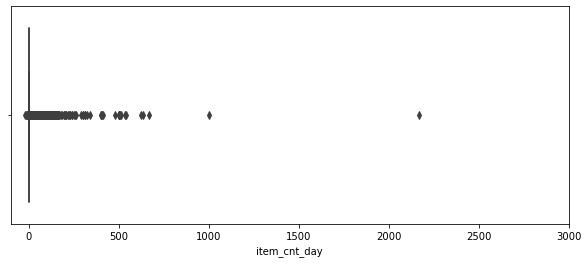

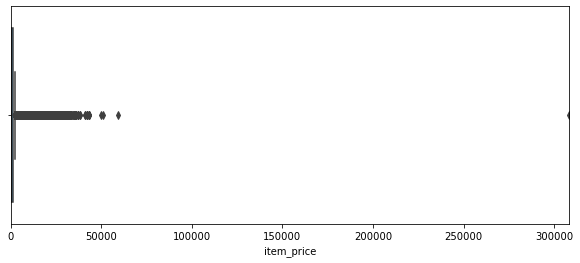

In [56]:
import seaborn as sb
plt.figure(figsize=(10,4))
plt.xlim(-100, 3000)
sb.boxplot(x=sales_train_df['item_cnt_day'])
print('Sale volume outliers:',sales_train_df['item_id'][sales_train_df['item_cnt_day']>900].unique())

plt.figure(figsize=(10,4))
plt.xlim(sales_train_df['item_price'].min(), sales_train_df['item_price'].max())
sb.boxplot(x=sales_train_df['item_price'])
print('Item price outliers:',sales_train_df['item_id'][sales_train_df['item_price']>300000].unique())

In [57]:
# remove outliers
sales_train_df = sales_train_df[(sales_train_df.item_price < 300000 ) & (sales_train_df.item_cnt_day < 900)]

In [58]:
#create a pivot table from train_sales
train_data = sales_train_df.pivot_table(index = ['shop_id','item_id'],values = ['item_cnt_day'],columns = ['date_block_num'],fill_value = 0,aggfunc='sum')
# reset indices for easy manipulation
train_data.reset_index(inplace = True)
train_data.head()

shop_id item_id item_cnt_day                        ...        \
date_block_num                            0   1  2  3  4  5  6  7  ... 24 25   
0                    0      30            0  31  0  0  0  0  0  0  ...  0  0   
1                    0      31            0  11  0  0  0  0  0  0  ...  0  0   
2                    0      32            6  10  0  0  0  0  0  0  ...  0  0   
3                    0      33            3   3  0  0  0  0  0  0  ...  0  0   
4                    0      35            1  14  0  0  0  0  0  0  ...  0  0   

                                        
date_block_num 26 27 28 29 30 31 32 33  
0               0  0  0  0  0  0  0  0  
1               0  0  0  0  0  0  0  0  
2               0  0  0  0  0  0  0  0  
3               0  0  0  0  0  0  0  0  
4               0  0  0  0  0  0  0  0  

[5 rows x 36 columns]

In [59]:
# merge train_data and test_df as to be suitable for prediction
all_data = pd.merge(test_df,train_data,on = ['item_id','shop_id'],how = 'left')

C:\Users\vrushang\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
C:\Users\vrushang\anaconda3\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [60]:
# fill all NaN values with 0
all_data.fillna(0,inplace = True)
# display
all_data.head()

,ID,shop_id,item_id,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)",...,"(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
all_data.drop(['ID','shop_id','item_id'],inplace = True, axis = 1)
all_data.head()

,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)","(item_cnt_day, 7)","(item_cnt_day, 8)","(item_cnt_day, 9)",...,"(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# FEATURE ENGINEERING 

In [21]:
train['day'] = train.date.str.split('.', expand=True).iloc[:,0].astype(int)
train['month'] = train.date.str.split('.', expand=True).iloc[:,1].astype(int)
train['year'] = train.date.str.split('.', expand=True).iloc[:,2].astype(int)

In [22]:
train['weekday'] = train['date'].apply(lambda d: (datetime.datetime.strptime(d, '%d.%m.%Y').weekday()))

In [23]:
train = train.drop(columns=['date','date_block_num','item_price'])
train.head()

,shop_id,item_id,item_cnt_day,day,month,year,weekday
0,59,22154,1.0,2,1,2013,2
1,25,2552,1.0,3,1,2013,3
2,25,2552,-1.0,5,1,2013,5
3,25,2554,1.0,6,1,2013,6
4,25,2555,1.0,15,1,2013,1


In [39]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


# IMPLEMENTATION 

In [72]:
y= train['item_cnt_day']
X= train.drop(columns=['item_cnt_day'])
X.head()

,shop_id,item_id,day,month,year,weekday
0,59,22154,2,1,2013,2
1,25,2552,3,1,2013,3
2,25,2552,5,1,2013,5
3,25,2554,6,1,2013,6
4,25,2555,15,1,2013,1


In [62]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [69]:
# create dummy samples
dummy_samples = [[0] * 34] * 2
# rename all_data columns to match dummy_samples dataframe
all_data.columns = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]
# create dummy_samples dataframe and concatenate with all_data
all_data = pd.concat([pd.DataFrame(dummy_samples), all_data], ignore_index=True)
# print shape of all_data
all_data.shape

(214204, 34)

In [64]:
# keep all columns execpt the last two 
train_data = np.expand_dims(all_data.values[:,:-2],axis = 2)
# keep all columns execpt the first and last
validation_data = np.expand_dims(all_data.values[:,1:-1],axis = 2)
# keep all columns execpt the first two
test_data = np.expand_dims(all_data.values[:,2:],axis = 2)
# print the shapes 
print(train_data.shape, validation_data.shape, test_data.shape)

(214202, 32, 1) (214202, 32, 1) (214202, 32, 1)


In [65]:
from numpy import array
# choose a number of time steps
n_steps = 3
# convert into input/output
X_train, y = split_sequences(train_data, n_steps)
X_val, y_val = split_sequences(validation_data, n_steps)
X_test, y_test = split_sequences(test_data, n_steps)
print(X_train.shape, y.shape)

(214200, 3, 31, 1) (214200, 1)


In [66]:
X = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_val = X_val.reshape((X_val.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_train.shape[1], X_train.shape[2]))

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size = 0.3, random_state = 60,shuffle=True)


# Random Forest 

In [74]:
# Create a model with 50 decision trees
forest_model= RandomForestRegressor(n_estimators = 10, random_state = 42)

# Train the model with training data
forest_model.fit(X_train,Y_train)
#make predictions using random forest model
y_pred =(forest_model.predict(X_test))




In [75]:
y_pred

array([1.1, 1. , 1. , ..., 1. , 1.1, 1. ])

In [79]:
y_test.head()

2791115    1.0
2303363    1.0
2369528    1.0
1488692    2.0
666816     1.0
Name: item_cnt_day, dtype: float64

## Random forest metrics

In [81]:
mean_squared_error = mean_squared_error(y_test,y_pred)
print("Mean Squared Error : " , mean_squared_error)
forest_SqMse = np.sqrt(mean_squared_error)
print("Root Mean Squared error: ", forest_SqMse)

print("Explain variance score for Random Forest Regression =", round(sm.explained_variance_score(y_test,y_pred), 2)) 
print("R2 score for Random Forest Regression =", round(sm.r2_score(y_test,y_pred), 2))

Mean Squared Error :  8.089042157328405
Root Mean Squared error:  2.844124145906505
Explain variance score for Random Forest Regression = -0.42
R2 score for Random Forest Regression = -0.42


# RESULTS

In [90]:
test_id = test['ID']
submission = pd.DataFrame(list(zip(test_id, y_pred)),
               columns =['ID', 'item_cnt_month'])
submission.tail(20)
submission.to_csv('y_pred.csv', index=False)

LSTM

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import  tensorflow.keras.optimizers as optimizers
# number of features
n_features = X.shape[2]
# define model
model = Sequential()
model.add(LSTM(64, activation= 'relu', dropout=0.2, recurrent_dropout=0.2, return_sequences=True,  input_shape=(n_steps, n_features)))
model.add(LSTM(64, activation= 'relu', dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1))
model.compile(optimizer=optimizers.Adam(lr=.0001), loss= 'mse', metrics = ['mean_squared_error'])     
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 64)             24576     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 57,665
Trainable params: 57,665
Non-trainable params: 0
_________________________________________________________________


C:\Users\vrushang\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [71]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
callbacks = [
    EarlyStopping(patience=5, verbose=1),
    ReduceLROnPlateau(factor=0.25, patience=2, min_lr=0.000001, verbose=1),
    ModelCheckpoint('model.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

In [72]:
# fit model
model.fit(X, y, epochs=15, callbacks=callbacks, validation_data=(X_val, y_val))

Epoch 1/15
6691/6694 [============================>.] - ETA: 0s - loss: 2.5642 - mean_squared_error: 2.5642
Epoch 1: val_loss improved from inf to 2.49277, saving model to model.h5
6694/6694 [==============================] - 87s 12ms/step - loss: 2.5633 - mean_squared_error: 2.5633 - val_loss: 2.4928 - val_mean_squared_error: 2.4928 - lr: 1.0000e-04
Epoch 2/15
6694/6694 [==============================] - ETA: 0s - loss: 1.8479 - mean_squared_error: 1.8479
Epoch 2: val_loss improved from 2.49277 to 2.46732, saving model to model.h5
6694/6694 [==============================] - 75s 11ms/step - loss: 1.8479 - mean_squared_error: 1.8479 - val_loss: 2.4673 - val_mean_squared_error: 2.4673 - lr: 1.0000e-04
Epoch 3/15
6689/6694 [============================>.] - ETA: 0s - loss: 1.5593 - mean_squared_error: 1.5593
Epoch 3: val_loss did not improve from 2.46732
6694/6694 [==============================] - 76s 11ms/step - loss: 1.5585 - mean_squared_error: 1.5585 - val_loss: 2.4676 - val_mean_sq

In [73]:
# create submission file 
submit = model.predict(X_test)
# clip between 0 and 20
submit = submit.clip(0,20)
# creating dataframe with required columns 
submission = pd.DataFrame({'ID':test_df['ID'],'item_cnt_month':submit.ravel()})
# creating csv file from dataframe
submission.to_csv('submit2a.csv',index = False)

6694/6694 [==============================] - 15s 2ms/step
